# Homework 3 11.09.2023

Room 3 : Buğra - Müge - Rana - Sena - Zeynep - Yaren

___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/times-data/timesData.csv')
cdf = df.copy()
df.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [3]:
df.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

---

Veri kümesinde toplam kaç üniversite bulunmaktadır? -1 

In [5]:
df['university_name'].nunique()

818

---

Veri kümesi hangi yıllar arasını kapsamaktadır?  - 2

In [6]:
print(df['year'].max(),df['year'].min())


2016 2011


---

Hangi ülkede en fazla üniversite bulunmaktadır? - 3

In [7]:
no_dub_df = df.drop_duplicates(subset=['university_name'])
print(no_dub_df['country'].value_counts().idxmax(),no_dub_df['country'].value_counts().max())

United States of America 161


---

Ortalama student_staff_ratio değeri nedir? - 4 

In [8]:
df['student_staff_ratio'].info

<bound method Series.info of 0        8.9
1        6.9
2        9.0
3        7.8
4        8.4
        ... 
2598    15.3
2599    28.7
2600     3.7
2601    12.1
2602    20.6
Name: student_staff_ratio, Length: 2603, dtype: float64>

In [9]:
df.student_staff_ratio.mean()

18.445283018867926

---

Görselleştirme: country bazında üniversite sayısını gösteren bir sütun grafiği çiziniz. - 5

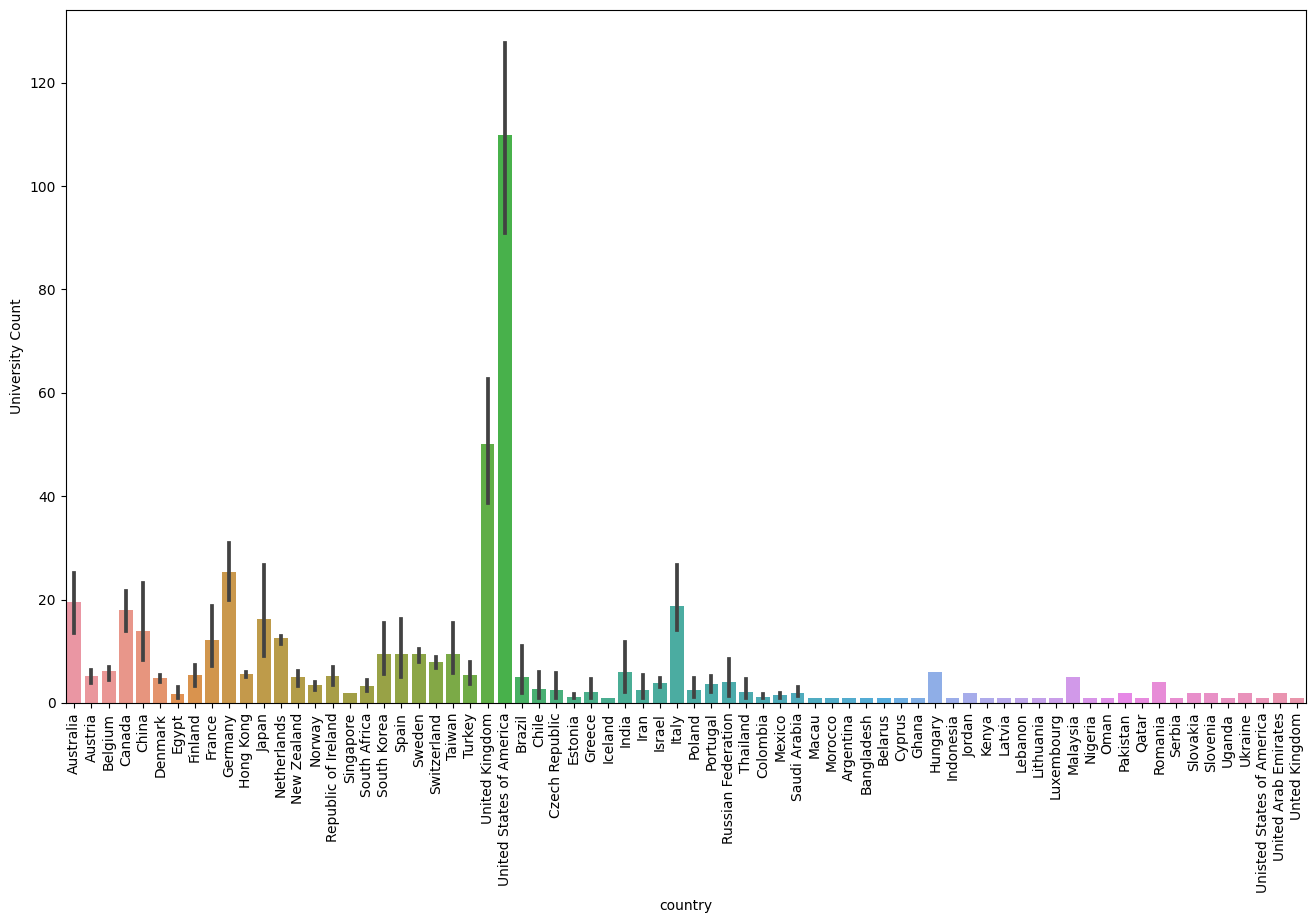

In [10]:
uni_count = df.groupby(['year','country']).size().reset_index(name='University Count')

plt.figure(figsize=(16,9))
plt.xticks(rotation=90)
sns.barplot(x='country',y='University Count',data=uni_count)
plt.show()



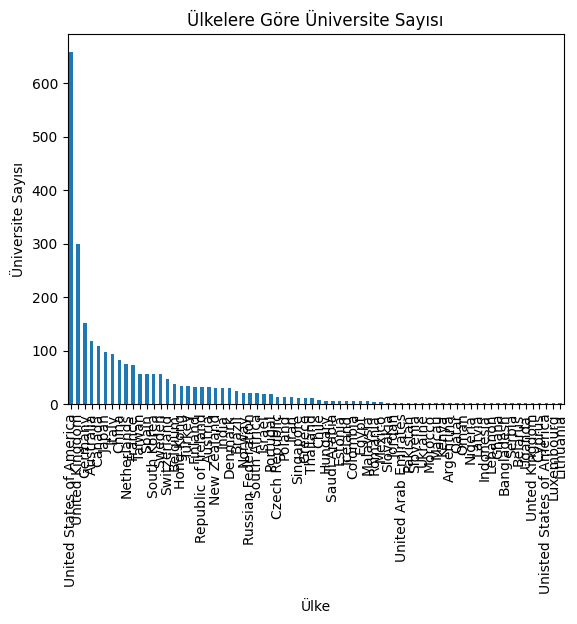

In [11]:
#Rana
universities_by_country=df['country'].value_counts()
universities_by_country.plot(kind='bar')
plt.title('Ülkelere Göre Üniversite Sayısı')
plt.xlabel('Ülke')
plt.ylabel('Üniversite Sayısı')
plt.xticks(rotation=90)
plt.show()

---

female_male_ratio ortalaması nedir? -6

In [12]:
temp_df = df.dropna(axis=0)
temp_df = temp_df[temp_df['female_male_ratio'] != '-']
temp_df['new_ratio'] = temp_df['female_male_ratio'].str.split(' : ').str[0].astype(int) / temp_df['female_male_ratio'].str.split(' : ').str[1].astype(int)
temp_df.replace([np.inf,-np.inf],np.nan,inplace=True)

temp_df['new_ratio'].mean()

1.0656644263120196

In [13]:
# Yaren 
def parse_female_male_ratio(ratio_str):
    try:
        if isinstance(ratio_str, str):
            female, male = map(int, ratio_str.split(':'))
            return female, male
        else:
            return None, None
    except ValueError:
        return None, None
df['female'], df['male'] = zip(*df['female_male_ratio'].map(parse_female_male_ratio))
df = df.dropna(subset=['female_male_ratio', 'female', 'male'],axis=0)
print(df[['female_male_ratio', 'female', 'male']],end='\n\n')
df=df[df['male']!=0]
temp_ratio = df['female'] / df['male']

print('Kadın erkek oranı ortalaması: ',temp_ratio.mean())

     female_male_ratio  female  male
1              33 : 67    33.0  67.0
2              37 : 63    37.0  63.0
3              42 : 58    42.0  58.0
4              45 : 55    45.0  55.0
5              46 : 54    46.0  54.0
...                ...     ...   ...
2597           29 : 71    29.0  71.0
2598           48 : 52    48.0  52.0
2599           36 : 64    36.0  64.0
2601           28 : 72    28.0  72.0
2602           43 : 57    43.0  57.0

[2367 rows x 3 columns]

Kadın erkek oranı ortalaması:  1.0684463755952236


---

total_score değeri 90'ın üzerinde olan üniversitelerin sayısı nedir? - 7

In [14]:
df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')
len(df[df["total_score"]>90]["university_name"].unique())

9

---

Görselleştirme: Farklı year değerleri için teaching puanlarının dağılımını gösteren bir kutu grafiği çiziniz. - 8 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2011'),
  Text(1, 0, '2012'),
  Text(2, 0, '2013'),
  Text(3, 0, '2014'),
  Text(4, 0, '2015'),
  Text(5, 0, '2016')])

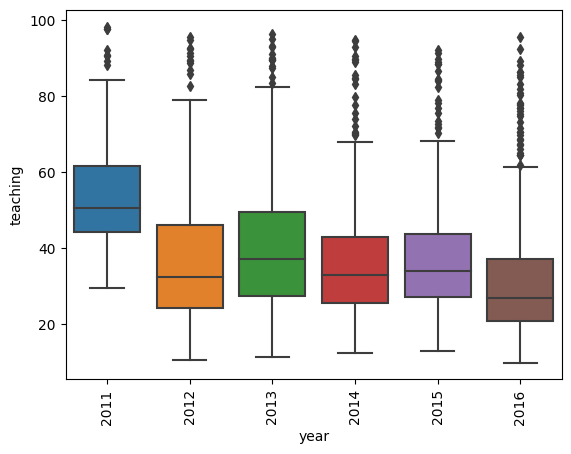

In [15]:
sns.boxplot(x="year", y="teaching", data=df)
plt.xticks(rotation = 90)

---

Hangi ülkede en yüksek international_students oranına sahip üniversite bulunmaktadır? - 9 

In [16]:
#Sena Nur

df["international_students"] = df["international_students"].str.replace("%","")
df["international_students"] = pd.to_numeric(df["international_students"], downcast ='signed')
max_deger = df["international_students"].max()
df[df["international_students"]== max_deger]["country"]

2411    United Arab Emirates
Name: country, dtype: object

---

Ortalama income değeri nedir? - 10

In [17]:
df['income'].info()

<class 'pandas.core.series.Series'>
Index: 2365 entries, 1 to 2602
Series name: income
Non-Null Count  Dtype 
--------------  ----- 
2365 non-null   object
dtypes: object(1)
memory usage: 37.0+ KB


In [18]:
temp_income_df=df.copy()
temp_income_df['income']=temp_income_df['income'].replace('-',np.nan)
temp_income_df['income']=temp_income_df['income'].replace('NaN',np.nan)
temp_income_df['income']=temp_income_df['income'].replace('nan',np.nan)
temp_income_df = temp_income_df.dropna(subset=['income'], axis=0)

temp_income_df['income']=temp_income_df['income'].astype(float)
temp_income_df.income.mean()

48.8126088950023

---

Hangi üniversite en yüksek research puanına sahip? - 1

In [19]:
temp_res_df = df.copy()

In [20]:
# Buğra

temp_res_df.groupby('university_name')['research'].mean().sort_values(ascending=False).head(1)

university_name
California Institute of Technology    98.25
Name: research, dtype: float64

In [21]:
# Rana 

en_yuksek_research_puanli_universite = df[df['research'] == df['research'].max()]['university_name'].values[0]
print(f"En yüksek research puanına sahip üniversite: {en_yuksek_research_puanli_universite}")

En yüksek research puanına sahip üniversite: University of California, Berkeley


In [22]:
# Sena Nur

df[df["research"]==df["research"].max()]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,female,male
209,10,"University of California, Berkeley",United States of America,82.8,50.4,99.4,99.4,62.5,89.8,"36,186",16.4,15.0,50 : 50,2012,50.0,50.0
602,1,California Institute of Technology,United States of America,96.3,59.8,99.4,99.7,95.6,95.5,"2,243",6.9,27.0,33 : 67,2013,33.0,67.0
607,6,Princeton University,United States of America,89.5,54.5,99.4,99.8,79.5,92.7,"7,929",8.4,27.0,45 : 55,2013,45.0,55.0


In [23]:
# Yaren

enYuksekResearch = df[df['research'] == df['research'].max()]['university_name'].values[0]
print(enYuksekResearch)

University of California, Berkeley


---

Hangi ülkede yer alan üniversiteler en yüksek ortalama total_score değerine sahiptir? -2

In [24]:
temp_totalscore_df = df.copy()
temp_totalscore_df = temp_totalscore_df.replace('Unted Kingdom','United Kingdom')
sorted_avg = temp_totalscore_df.groupby(['country','university_name'])['total_score'].mean().sort_values(ascending=False).reset_index()
sorted_avg.sort_values(by=['country','total_score'],ascending=[False,False])

,country,university_name,total_score
0,United States of America,California Institute of Technology,95.116667
1,United States of America,Stanford University,93.750000
3,United States of America,Massachusetts Institute of Technology,92.983333
4,United States of America,Princeton University,92.250000
6,United States of America,"University of California, Berkeley",89.650000
...,...,...,...
252,Australia,University of Tasmania,NaN
253,Australia,University of Technology Sydney,NaN
254,Australia,University of Wollongong,NaN
255,Australia,Western Sydney University,NaN


In [25]:
# Rana 

en_yuksek_ortalama_total_score_ulke = temp_totalscore_df.groupby('country')['total_score'].mean().idxmax()
print(f"En yüksek ortalama total_score değerine sahip ülke: {en_yuksek_ortalama_total_score_ulke}")

En yüksek ortalama total_score değerine sahip ülke: Singapore


---

world_rank 1-100 arasında olan üniversitelerin ortalama international puanı nedir? -3 

In [26]:
df['world_rank'].unique()

array(['2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13', '14',
       '15', '19', '20', '21', '22', '23', '24', '25', '27', '28', '29',
       '30', '32', '33', '34', '35', '36', '39', '40', '42', '43', '47',
       '48', '49', '51', '52', '53', '54', '56', '58', '59', '60', '61',
       '63', '64', '65', '66', '67', '68', '71', '72', '73', '75', '76',
       '77', '78', '79', '81', '83', '85', '87', '88', '90', '93', '95',
       '98', '99', '100', '101', '102', '103', '104', '105', '106', '107',
       '109', '111', '112', '114', '115', '117', '118', '119', '120',
       '122', '124', '127', '128', '129', '130', '132', '135', '137',
       '138', '139', '140', '142', '143', '144', '145', '147', '149',
       '151', '152', '155', '156', '159', '161', '163', '164', '165',
       '167', '168', '170', '171', '172', '173', '174', '177', '178',
       '181', '182', '183', '184', '185', '186', '187', '189', '190',
       '193', '195', '196', '197', '199', '1', '7', '16', '17', '18'

In [27]:
df['international'] = df['international'].str.replace('-', '0', regex=True)


In [28]:
df['international']=df['international'].astype(float)

In [29]:
filt_list = ['1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13',
       '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '47', '48', '49', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '63', '64',
       '65', '66', '67', '68', '71', '72', '73', '75', '76', '77', '78',
       '79', '81', '83', '85', '86', '87', '88', '89', '90', '93', '94',
       '95', '98', '99', '100','7','16','31', '44', '45', '46', '62', '69', 
       '70', '74', '80', '84', '91',
       '92', '96', '97','=39', '=44', '=47', '=56', '=60', '=65', '=76', '=82', '=88',
       '=90', '=94', '=99',]

df[df['world_rank'].astype(str).isin(filt_list)]['international'].mean()

60.56107899807322

---

Görselleştirme: En yüksek 10 teaching puanına sahip üniversiteleri ve bu puanları gösteren bir bar grafiği oluşturunuz. -4 

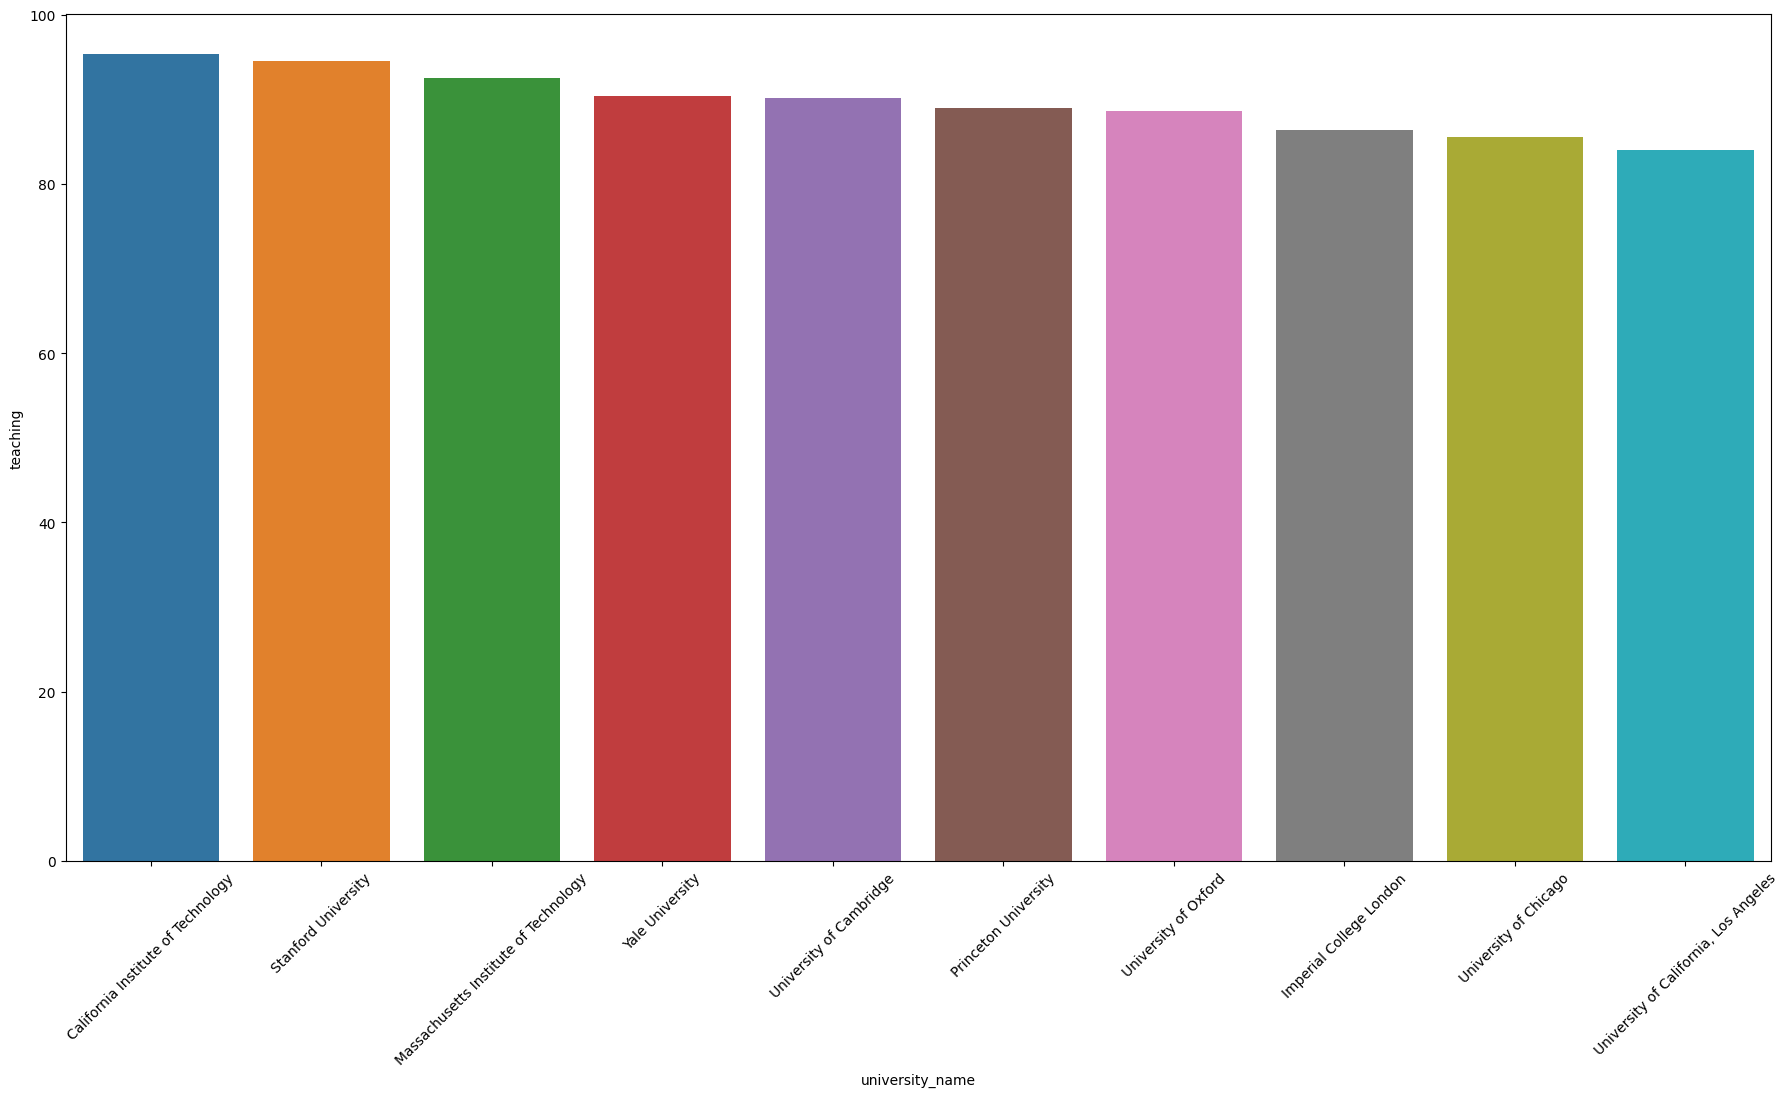

In [30]:
temp_teach_df = df.copy()
grouped_teach = temp_teach_df.groupby('university_name')['teaching'].mean().reset_index()
plt.figure(figsize=(22,11))
plt.xticks(rotation=45)
sns.barplot(x='university_name',y='teaching',data=grouped_teach.sort_values(by=['teaching'],ascending=False).head(10))
plt.show()



---

Hangi üniversiteler ortalamanın üzerinde citations puanına sahip? -5 

In [31]:
df = df.copy()
grp_citation = df.groupby('university_name')['citations'].mean().reset_index()
mean_citations = df.citations.mean()
print('mean Citation Score: ',mean_citations,end='\n')
grp_citation[grp_citation['citations']> mean_citations].sort_values(by=['citations'],ascending=False).reset_index(drop=True)

mean Citation Score:  61.00422832980973


,university_name,citations
0,Massachusetts Institute of Technology,99.916667
1,"University of California, Santa Cruz",99.866667
2,California Institute of Technology,99.800000
3,Rice University,99.750000
4,Princeton University,99.716667
...,...,...
252,University of Bologna,61.540000
253,University of Western Australia,61.460000
254,"University of Maryland, Baltimore County",61.300000
255,University of Greifswald,61.300000


In [32]:
# Rana

ustundeki_universiteler = df[df['citations'] > df['citations'].mean()]
print(ustundeki_universiteler[['university_name', 'citations']])

                            university_name  citations
1        California Institute of Technology       99.9
2     Massachusetts Institute of Technology       99.9
3                       Stanford University       99.2
4                      Princeton University       99.9
5                   University of Cambridge       94.0
...                                     ...        ...
2277    University of Rome II – Tor Vergata       64.5
2278         University of Rovira i Virgili       66.9
2288                  University of Tampere       63.7
2291          Tokyo Metropolitan University       72.2
2297          University of Urbino Carlo Bo       66.8

[1236 rows x 2 columns]


In [33]:
# Yaren

ortalamaUstu = df['citations'] > df['citations'].mean()
sonuc = df[ortalamaUstu]
print(sonuc[['university_name', 'citations']])

                            university_name  citations
1        California Institute of Technology       99.9
2     Massachusetts Institute of Technology       99.9
3                       Stanford University       99.2
4                      Princeton University       99.9
5                   University of Cambridge       94.0
...                                     ...        ...
2277    University of Rome II – Tor Vergata       64.5
2278         University of Rovira i Virgili       66.9
2288                  University of Tampere       63.7
2291          Tokyo Metropolitan University       72.2
2297          University of Urbino Carlo Bo       66.8

[1236 rows x 2 columns]


---

num_students değeri 50.000'in üzerinde olan üniversitelerin sayısı nedir? -6 

In [34]:
student_df = df.copy()
student_df = student_df.dropna(subset='num_students',axis=0)
student_df['num_students'] = student_df['num_students'].str.replace(',', "")

student_df.num_students = student_df.num_students.astype(int)
grp_student = student_df.groupby('university_name')['num_students'].mean().reset_index()
print(grp_student[grp_student['num_students']>50000].shape[0])
grp_student[grp_student['num_students']>50000].sort_values(by='num_students',ascending=False).reset_index(drop=True)

47


,university_name,num_students
0,Anadolu University,379231.0
1,Cairo University,231941.0
2,University of South Africa,197102.0
3,National Autonomous University of Mexico,137378.0
4,Alexandria University,127431.0
5,Sapienza University of Rome,120986.0
6,National University of Córdoba,108373.0
7,University of Belgrade,96968.0
8,Complutense University of Madrid,86519.0
9,University of Bologna,85532.0


---

Hangi ülkede en yüksek student_staff_ratio değerine sahip üniversite bulunmaktadır? - 7 

In [35]:
staff_df = df.copy()
staff_df = staff_df.dropna(subset='student_staff_ratio',axis=0)
staff_df['student_staff_ratio'] = staff_df['student_staff_ratio'].astype(float)
grp_staff = staff_df.groupby('university_name')['student_staff_ratio'].mean().reset_index()

grp_staff.sort_values(by='student_staff_ratio',ascending=False).head(1)


,university_name,student_staff_ratio
14,Anadolu University,162.6


In [36]:
en_yuksek_student_staff_ratio_universite = df[df['student_staff_ratio'] == df['student_staff_ratio'].max()][['university_name', 'country', 'student_staff_ratio']]
print(en_yuksek_student_staff_ratio_universite)

         university_name country  student_staff_ratio
2413  Anadolu University  Turkey                162.6


---

Görselleştirme: Üniversitelerin female_male_ratio değerlerini gösteren bir histogram oluşturunuz. - 8 

(array([2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.]),
 [Text(2010.0, 0, '2010'),
  Text(2011.0, 0, '2011'),
  Text(2012.0, 0, '2012'),
  Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017')])

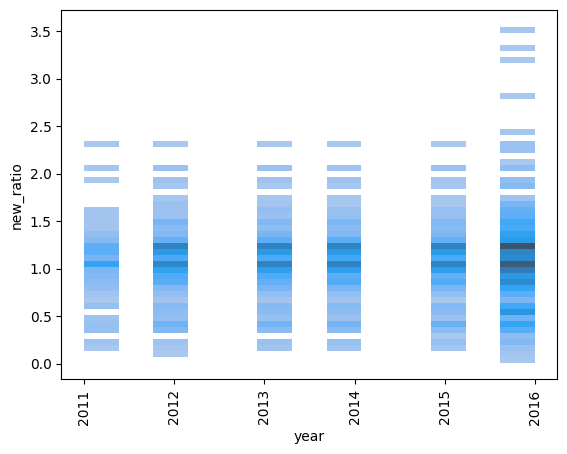

In [37]:
sns.histplot(data=temp_df,x='year', y='new_ratio')
plt.xticks(rotation = 90)

---

world_rank değeri 50'nin altında olan üniversitelerin ortalama income değeri nedir?- 9

In [38]:
world_rank_df = df.copy()
temp_rank = []

for x in world_rank_df.world_rank:
    if '=' in x:
        temp_rank.append(int(x.split('=')[1]))
    elif '-' in x:
        temp_rank.append((int(x.split('-')[0]) + int(x.split('-')[1])) / 2)
    else:
        temp_rank.append(int(x))

world_rank_df['temp_rank'] = temp_rank

world_rank_df.temp_rank = world_rank_df.temp_rank.round()
world_rank_df.temp_rank = world_rank_df.temp_rank.astype(int)

world_rank_50 = world_rank_df[world_rank_df['temp_rank']<50]


world_rank_50['income'] = world_rank_50['income'].replace('-',np.nan)
world_rank_50 = world_rank_50.dropna(subset=['income'],axis=0)
world_rank_50.income = world_rank_50.income.astype(float)

world_rank_50.income.mean()

/tmp/ipykernel_20/1886805494.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_rank_50['income'] = world_rank_50['income'].replace('-',np.nan)


60.69954751131221

---

international_students oranı %30'un üzerinde olan üniversitelerin sayısı nedir? - 10

In [39]:
inter_df_last = cdf.copy()

inter_df_last['international_students'] = inter_df_last['international_students'].str.split('%').str[0].reset_index(drop=True)
inter_df_last['international_students']=inter_df_last['international_students'].replace('nan', np.nan)
inter_df_last = inter_df_last.dropna(subset=['international_students'],axis=0)
inter_df_last['international_students'] = inter_df_last['international_students'].astype(int)
grp_inter = inter_df_last.groupby('university_name')['international_students'].mean()>30
grp_inter.sum()

58